<a href="https://colab.research.google.com/github/Nomnomers/DataAnalyst_freecodecamp/blob/main/JupyterNotebook_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

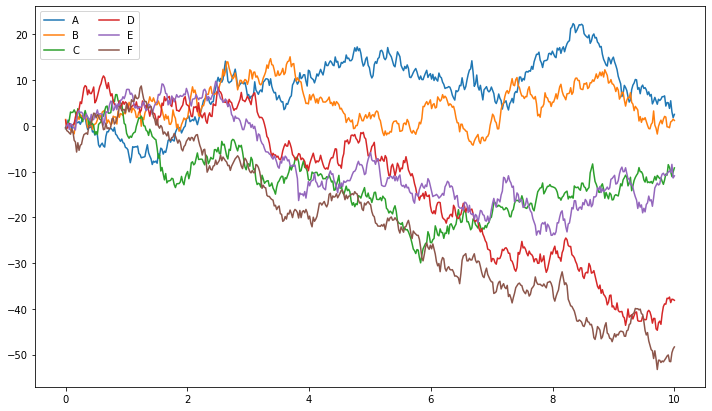

In [3]:
plt.figure(figsize = (12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol = 2, loc = 'upper left')

**Data Interactment** 

In [5]:
import requests
import pandas as pd

In [6]:
def get_historic_price(symbol, exchange = 'bitfinex', after = '2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(symbol=symbol, exchange=exchange)
    resp = requests.get(url, params = 
        {
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
        }
      )
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns = 
      [
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
      ]
    )
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit = 's')
    df.set_index('CloseTime', inplace = True)
    return df

In [7]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-01-25 06:11:52.653557')

In [8]:
btc = get_historic_price('btc', 'bitstamp', after = last_week)

In [9]:
eth = get_historic_price('eth', 'bitstamp', after = last_week)

In [10]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-01-25 07:00:00,36082.63,36138.45,35861.13,35867.63,59.974620,2.159406e+06
2022-01-25 08:00:00,35867.63,36127.31,35722.43,36075.15,59.190542,2.125440e+06
2022-01-25 09:00:00,36047.90,36545.02,36030.04,36107.98,148.594773,5.386919e+06
2022-01-25 10:00:00,36107.98,36536.96,36062.12,36449.70,143.644061,5.225132e+06
2022-01-25 11:00:00,36462.33,36814.81,36312.23,36471.30,387.888186,1.415178e+07


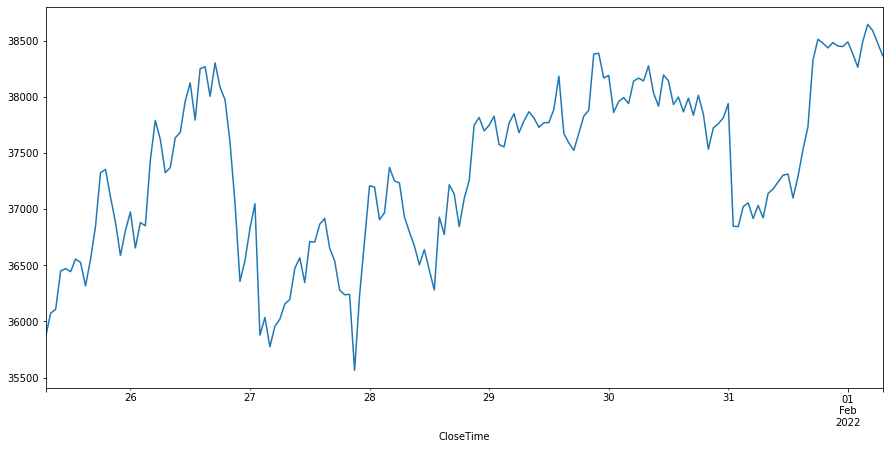

In [11]:
btc['ClosePrice'].plot(figsize = (15, 7))

In [12]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-01-25 07:00:00,2396.91,2399.14,2364.73,2367.84,509.133101,1.210842e+06
2022-01-25 08:00:00,2364.33,2389.84,2350.00,2387.28,800.193966,1.893569e+06
2022-01-25 09:00:00,2385.14,2413.35,2376.98,2387.59,519.944978,1.245472e+06
2022-01-25 10:00:00,2388.34,2433.38,2384.55,2427.80,426.213868,1.026748e+06
2022-01-25 11:00:00,2428.55,2457.12,2420.37,2432.93,521.341583,1.269173e+06


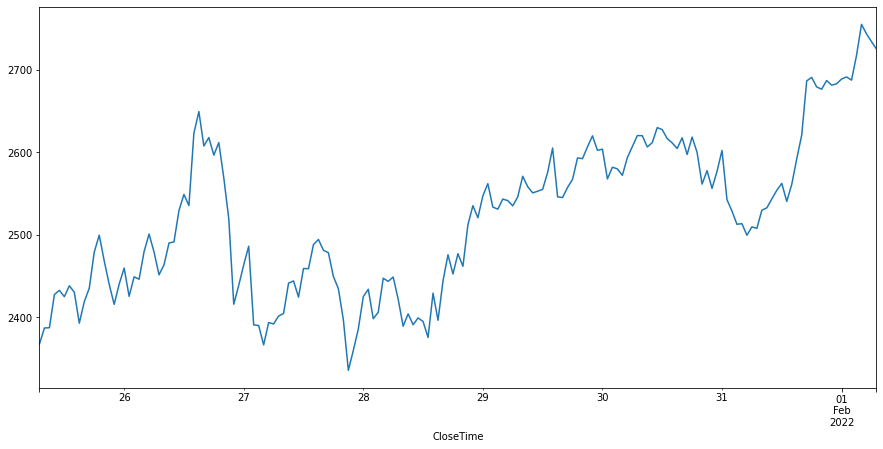

In [13]:
eth['ClosePrice'].plot(figsize = (15, 7))

**Dynamic Plots with Bokeh**

In [14]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [15]:
output_notebook()

In [19]:
p1 = figure(x_axis_type = 'datetime', title = 'Crypto Prices', width = 800)
p1.grid.grid_line_alpha = 0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color = '#f2a900', legend = 'Bitcoin')

p1.legend.location = 'top_left'

show(p1)

**Exporting to Excel**

In [20]:
writer = pd.ExcelWriter('crypos.xlsx')

In [21]:
btc.to_excel(writer, sheet_name = 'Bitcoin')

In [22]:
eth.to_excel(writer, sheet_name = 'Ether')

In [23]:
writer.save()